In [13]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [31]:
x = torch.ones(n,2) 
x[:,0].uniform_(-2.,2)
x[:5]

tensor([[ 1.5991,  1.0000],
        [-0.3541,  1.0000],
        [ 1.8938,  1.0000],
        [-1.4977,  1.0000],
        [-0.7137,  1.0000]])

In [32]:
a = tensor(3., 2); a

tensor([3., 2.])

In [16]:
x1 = torch.ones(n,3)
x1[:,0].uniform_(-1.,1)   # replace all rows of the first column with with uniform distribution -1...1
x1[:5]

tensor([[-0.6817,  1.0000,  1.0000],
        [-0.6753,  1.0000,  1.0000],
        [-0.2330,  1.0000,  1.0000],
        [ 0.8593,  1.0000,  1.0000],
        [ 0.5561,  1.0000,  1.0000]])

In [33]:
y = x@a + torch.rand(n)

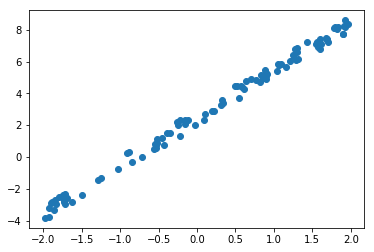

In [34]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) or **coefficients** `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [35]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [36]:
a = tensor(-1.,1)
a.type

<function Tensor.type>

In [37]:
y_hat = x@a
mse(y_hat, y)

tensor(30.0072)

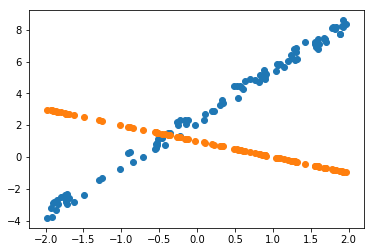

In [38]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [39]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [40]:
def update():
    y_hat = x@a                 #Prediction
    loss = mse(y, y_hat)        #Loss function
    if t % 10 == 0: print(loss)
    loss.backward()             #Process to calculate gradient
    with torch.no_grad():
        a.sub_(lr * a.grad)      #parameter- = learningrate*parameter.gradient
        a.grad.zero_()

In [45]:
lr = 1e-2
for t in range(60): update()

tensor(0.0791, grad_fn=<MeanBackward1>)
tensor(0.0791, grad_fn=<MeanBackward1>)
tensor(0.0791, grad_fn=<MeanBackward1>)
tensor(0.0791, grad_fn=<MeanBackward1>)
tensor(0.0791, grad_fn=<MeanBackward1>)
tensor(0.0791, grad_fn=<MeanBackward1>)


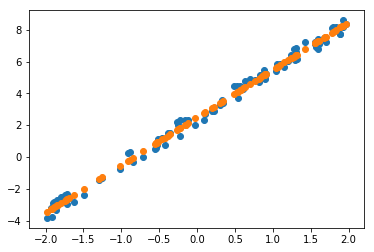

In [46]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [29]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [47]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

#100 times, 20ms interval in each one

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.